# Examining the relationship between 'Money Spent' and 'Matches Won' in the English Premier League
=================================================================================================================

*Michael Black*

---

What I wanted to do here was set about exploring the relationship between "Money Spent" and "Matches Won" in the English Premier League.  Is there a clear correlation between spending money and winning matches? (Yes) Have the richest clubs only widened the gap between them and there less-wealthy competitiors over the years? (Also, yes)

None of the results here are particlarly surprising, but they are illuminating of the vast unfairness of the current model in the English Premier League, and just how hard is it to compete without a top-flight budget.

**I use data from 2000-'01 (referenced as 2000) up until 2019-'20 (2019).**

---

In [1]:
# Importing libraries

import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px 

# Set Pandas options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

> For seasons 2000-2013, I was able to find an [Excel sheet on Reddit](https://www.reddit.com/r/soccer/comments/24z9pg/premier_league_wage_bill_data_since_the_20002001/) containing the wage bill and final league standings for each EPL season.  For simplicity, I copy and pasted each of these into its own sheet in the Excel file and loaded them into their own DataFrames.

> For 2014-2019, it was less simple.  I cross referenced multiple sources from The Guardian to Planet Football and manually entered the data into Excel myself.

In [2]:
df_2000 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2000', index_col = 0)
df_2001 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2001', index_col = 0)
df_2002 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2002', index_col = 0)
df_2003 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2003', index_col = 0)
df_2004 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2004', index_col = 0)
df_2005 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2005', index_col = 0)
df_2006 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2006', index_col = 0)
df_2007 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2007', index_col = 0)
df_2008 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2008', index_col = 0)
df_2009 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2009', index_col = 0)
df_2010 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2010', index_col = 0)
df_2011 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2011', index_col = 0)
df_2012 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2012', index_col = 0)
df_2013 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2013', index_col = 0)
df_2014 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2014', index_col = 0)
df_2015 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2015', index_col = 0)
df_2016 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2016', index_col = 0)
df_2017 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2017', index_col = 0)
df_2018 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2018', index_col = 0)
df_2019 = pd.read_excel("Premier League Wage Data.xlsx", sheet_name = '2019', index_col = 0)

In [3]:
# Example DataFrame

df_2018

,Season Wage Bill (£mil),Final League Standing,Points Gained
2018,,,
MANCHESTER CITY,315,1,98
LIVERPOOL,310,2,97
CHELSEA,286,3,72
TOTTENHAM HOTSPUR,179,4,71
ARSENAL,232,5,70
MANCHESTER UNITED,332,6,66
WOLVERHAMPTON WANDERERS,92,7,57
EVERTON,160,8,54
LEICESTER CITY,150,9,52


---

> Below, I concat all 18 DataFrames into one DF titled 'concatenated'.

> Underneath that, I add a column called 'Team Name' which is just a copy of the DataFrame index.

> Lastly, I create a new column called **'Cursor Info'** - which combines 'Team Name', 'Season Wage Bill (£mil)',
'Final League Standing', and 'Points Gained'.  The reason for this will be more clear below when we make use of our mplcursors function in our live regplot graph, but essentially it is just a visual tool that allows us to extract more data from our graph.

In [4]:
concatenated = (pd.concat([df_2000.assign(dataset='2000'), df_2001.assign(dataset='2001'), 
                           df_2002.assign(dataset='2002'), df_2003.assign(dataset='2003'),
                           df_2004.assign(dataset='2004'), df_2005.assign(dataset='2005'), 
                           df_2006.assign(dataset='2006'), df_2007.assign(dataset='2007'),
                           df_2008.assign(dataset='2008'), df_2009.assign(dataset='2009'), 
                           df_2010.assign(dataset='2010'), df_2011.assign(dataset='2011'),
                           df_2012.assign(dataset='2012'), df_2013.assign(dataset='2013'),
                           df_2014.assign(dataset='2014'), df_2015.assign(dataset='2015'),
                           df_2016.assign(dataset='2016'), df_2017.assign(dataset='2017'),
                           df_2018.assign(dataset='2018'), df_2019.assign(dataset='2019')]))

concatenated['Team Name'] = concatenated.index   

concatenated['Hover Name'] = (concatenated['Team Name'] + ' | ' + 
                              concatenated['Final League Standing'].astype(str))

In [5]:
# Example DataFrame

concatenated

,Season Wage Bill (£mil),Final League Standing,Points Gained,dataset,Team Name,Hover Name
MANCHESTER UNITED,50,1,80,2000,MANCHESTER UNITED,MANCHESTER UNITED | 1
ARSENAL,41,2,70,2000,ARSENAL,ARSENAL | 2
LIVERPOOL,49,3,69,2000,LIVERPOOL,LIVERPOOL | 3
LEEDS UNITED,43,4,68,2000,LEEDS UNITED,LEEDS UNITED | 4
IPSWICH TOWN,18,5,66,2000,IPSWICH TOWN,IPSWICH TOWN | 5
...,...,...,...,...,...,...
WEST HAM,127,16,39,2019,WEST HAM,WEST HAM | 16
ASTON VILLA,109,17,35,2019,ASTON VILLA,ASTON VILLA | 17
BOURNEMOUTH,108,18,34,2019,BOURNEMOUTH,BOURNEMOUTH | 18
WATFORD,84,19,34,2019,WATFORD,WATFORD | 19


---
## Time to graph!

We write a function below which will create a scatterplot with a line of regression for any given Premier League season since 2000.

**The graph is interactive, so by simply hovering over a point we can see**: 
- name of the team
- final standing for that season
- wages spent
- points won
- EXPECTED points won for their wages spent

In [39]:
%matplotlib inline
def plot_it(year):

    year = concatenated[concatenated['dataset'] == str(year)]
    
    fig = px.scatter(data_frame = year, x='Season Wage Bill (£mil)', y='Points Gained',
                     color = 'Season Wage Bill (£mil)', template = 'presentation', 
                     title = year['dataset'][0] + ' Season', 
                     size = year['Final League Standing'].sort_values(ascending=False), 
                     hover_name= 'Hover Name', size_max=30, trendline = 'ols',
                     color_continuous_scale=px.colors.sequential.Jet, width = 880, height = 680)
    
    return fig

### Plotting the 2019-'20 EPL Season

In [40]:
plot_it(2019)

### Plotting the 2015-2016 EPL Season

In [41]:
plot_it(2015)

> One of the more improbable Premier League seasons ever, and one of the most fun to visualize.  **Leicester City, who only spent £1.7 million more than the BOTTOM 3, not only avoided relegation but won the entire league!**  Chelsea, on the other end of the spectrum, spent roughly £225 million to finish 31 points behind the frugal champs.

> By using our hover feature and trendline, we can see that Leciester should have scored 48 points...rather than the 81 they ended up with.  An All-Time outlier.

---

### Bar chart showing the average wage bill for all teams in the EPL season by season

In [9]:
seasons = (['2000', '2001', '2002', '2003', '2004', '2005', '2006',
           '2007', '2008', '2009', '2010', '2011', '2012', '2013',
           '2014', '2015', '2016', '2017', '2018', '2019'])

In [10]:
season_wages = {}
count = 0
count2 = 20

for i in seasons:
    
    season_wages[i] = concatenated[count:count2]['Season Wage Bill (£mil)'].mean()
    
    count += 20
    count2 += 20
    
season_wages_df = (pd.DataFrame.from_dict(season_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

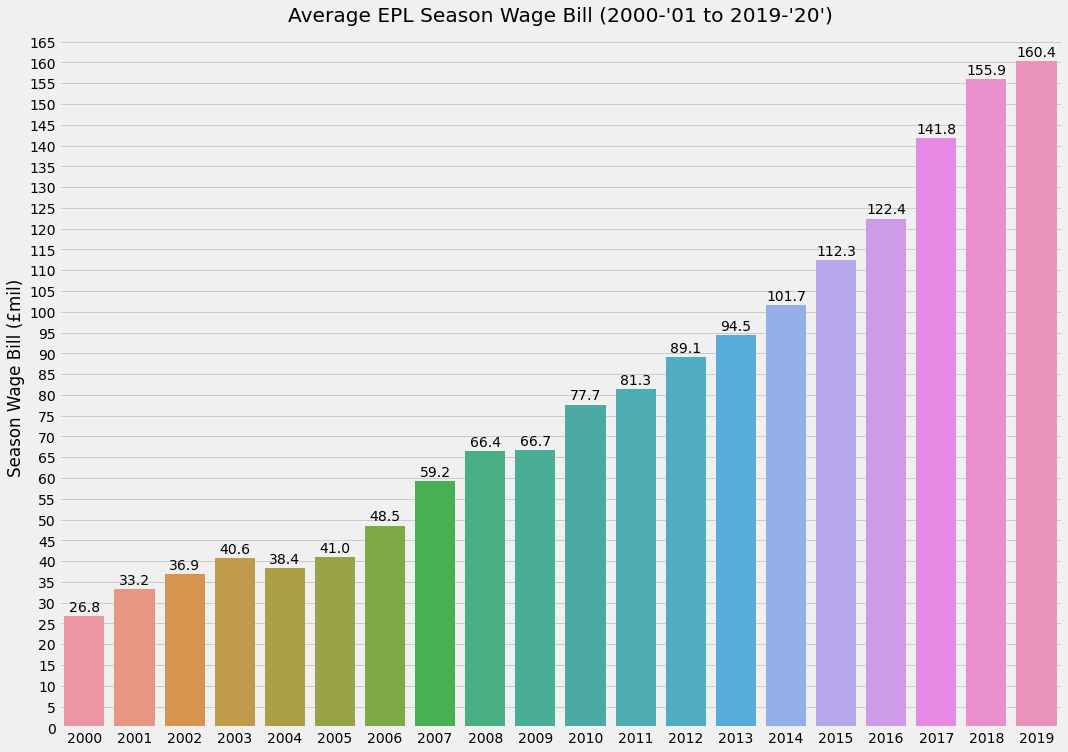

In [11]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = season_wages_df.index, y = 'Season Wage Bill (£mil)', data = season_wages_df)
plt.yticks(np.arange(0, season_wages_df['Season Wage Bill (£mil)'].max() + 5, 5))

plt.title("Average EPL Season Wage Bill (2000-'01 to 2019-'20')")
for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
        
plt.show()

> Staggering annual average growth since 2000-2001.

### Factoring for Inflation

In [12]:
inflate_list = season_wages_df['Season Wage Bill (£mil)'].tolist()

inflation = []
inflation.append(inflate_list[0])

ct = 1

for i in inflate_list[1:]:

    inflation.append(round(((inflate_list[ct] / (1 + 0.0185)**inflate_list.index(i))), 2))

    ct += 1
    
inflation_df = pd.DataFrame()
inflation_df['Season Wage Bill (£mil) Adjusted for Inflation'] = inflation
inflation_df['Season Wage Bill (£mil)'] = season_wages_df['Season Wage Bill (£mil)'].tolist()
inflation_df['Season'] = season_wages_df.index

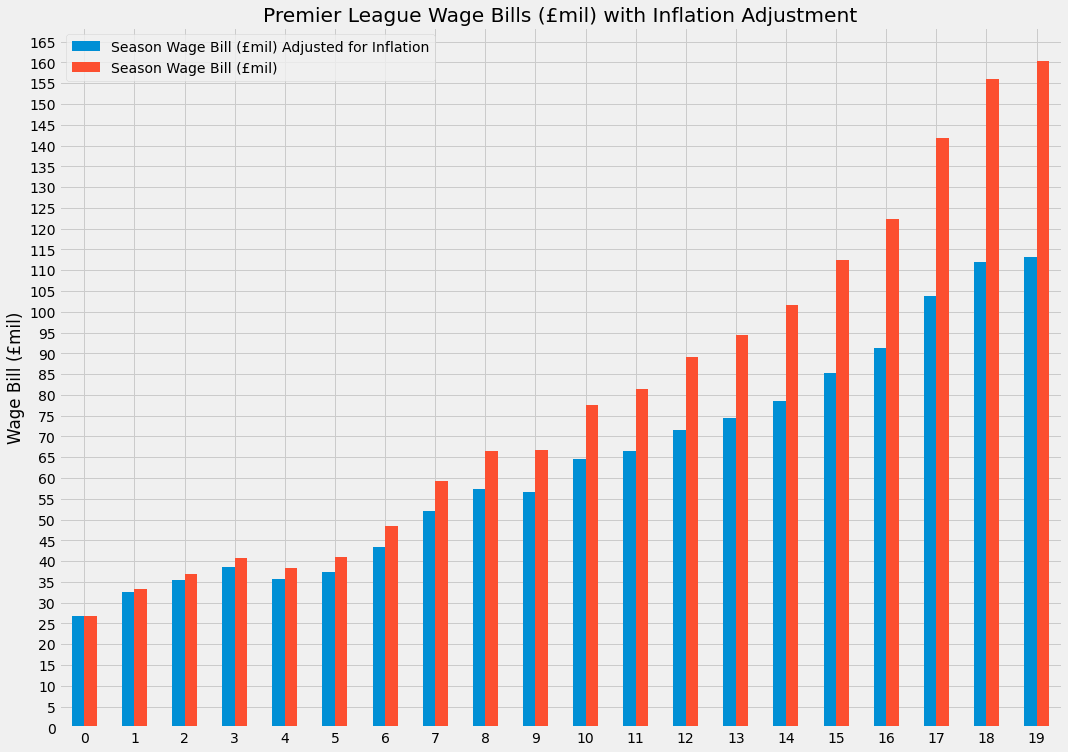

In [13]:
%matplotlib inline

plt.style.use('fivethirtyeight')

ax = inflation_df.plot.bar(rot=0, figsize = (16, 12), title = 'Premier League Wage Bills (£mil) with Inflation Adjustment')

ax.set_ylabel("Wage Bill (£mil)")

plt.yticks(np.arange(0, inflation_df['Season Wage Bill (£mil)'].max() + 5, 5))
print(' ')

> Still spending ~4.5x more than in 2000

---

### Bar chart showing the average wage bills for Top 4 teams in the EPL season by season

In [14]:
top4_wages = {}
count = 0
count2 = 4

for i in seasons:
    
    top4_wages[i] = concatenated[count:count2]['Season Wage Bill (£mil)'].mean()
    
    count += 20
    count2 += 20
    
top4_wages_df = (pd.DataFrame.from_dict(top4_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

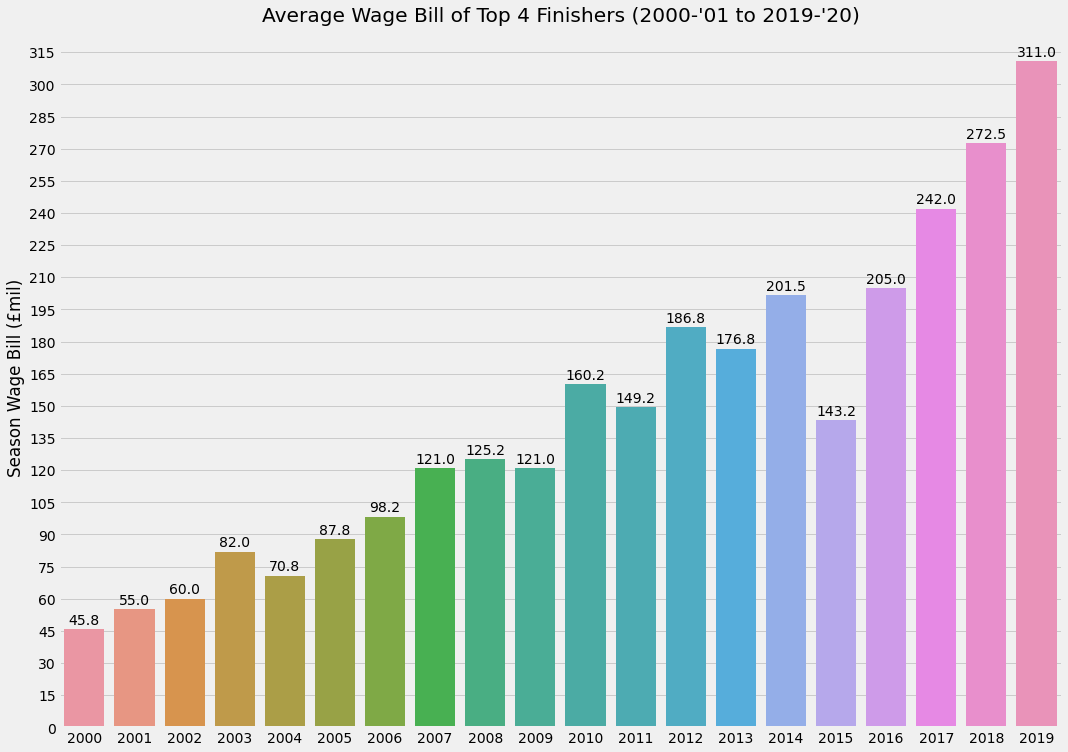

In [15]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = top4_wages_df.index, y = 'Season Wage Bill (£mil)', data = top4_wages_df)

plt.yticks(np.arange(0, top4_wages_df['Season Wage Bill (£mil)'].max() + 10, 15))

plt.title("Average Wage Bill of Top 4 Finishers (2000-'01 to 2019-'20)")

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

> To qualify for the Champions League in 2020, you need £300 million to spare...

---

### Bar chart showing the average wage bills for Bottom 3 teams in the EPL season by season

In [16]:
bottom3_wages = {}
count = 17
count2 = 20

for i in seasons:
    
    bottom3_wages[i] = round(concatenated[count:count2]['Season Wage Bill (£mil)'].mean(), 2)
    
    count += 20
    count2 += 20
    
bottom3_wages_df = (pd.DataFrame.from_dict(bottom3_wages, orient = 'index').
                   rename(columns = {0 : 'Season Wage Bill (£mil)'}))

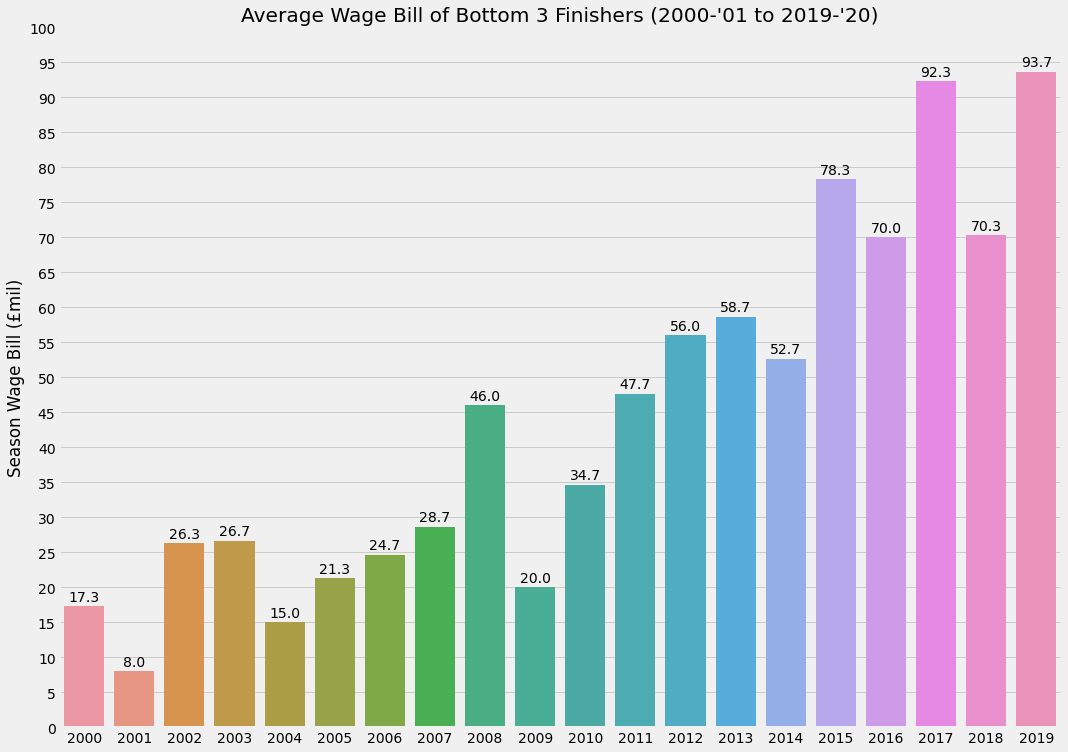

In [17]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = top4_wages_df.index, y = 'Season Wage Bill (£mil)', data = bottom3_wages_df)

plt.yticks(np.arange(0, bottom3_wages_df['Season Wage Bill (£mil)'].max() + 10, 5))

plt.title("Average Wage Bill of Bottom 3 Finishers (2000-'01 to 2019-'20)")

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

> To be relegated in 2020, £94 million will do the trick.

---

### Comparing the spending habits of the Top 4 teams by the Bottom 3 teams season by season

In [18]:
comparison = top4_wages_df.join(bottom3_wages_df, how = 'left', lsuffix=' Top 4', rsuffix=' Bottom 3')
comparison.rename(columns = {"Season Wage Bill (£mil) Top 4" : "Top 4", "Season Wage Bill (£mil) Bottom 3": "Bottom 3"}, inplace = True)
comparison['Difference'] = comparison['Top 4'] - comparison['Bottom 3']

comparison

,Top 4,Bottom 3,Difference
2000,45.75,17.33,28.42
2001,55.00,8.00,47.00
2002,60.00,26.33,33.67
2003,82.00,26.67,55.33
2004,70.75,15.00,55.75
2005,87.75,21.33,66.42
2006,98.25,24.67,73.58
2007,121.00,28.67,92.33
2008,125.25,46.00,79.25
2009,121.00,20.00,101.00


> This DataFrame shows very clearly the vast gulf in spending between the clubs at the top of the Prem and those at the bottom.  **Top 4 teams now spend over £200 million more than Bottom 3 teams each year!!!  20 years ago, that figure was just £30 million.**

### Bar chart showing the growth from the "Difference" column in the DataFrame above

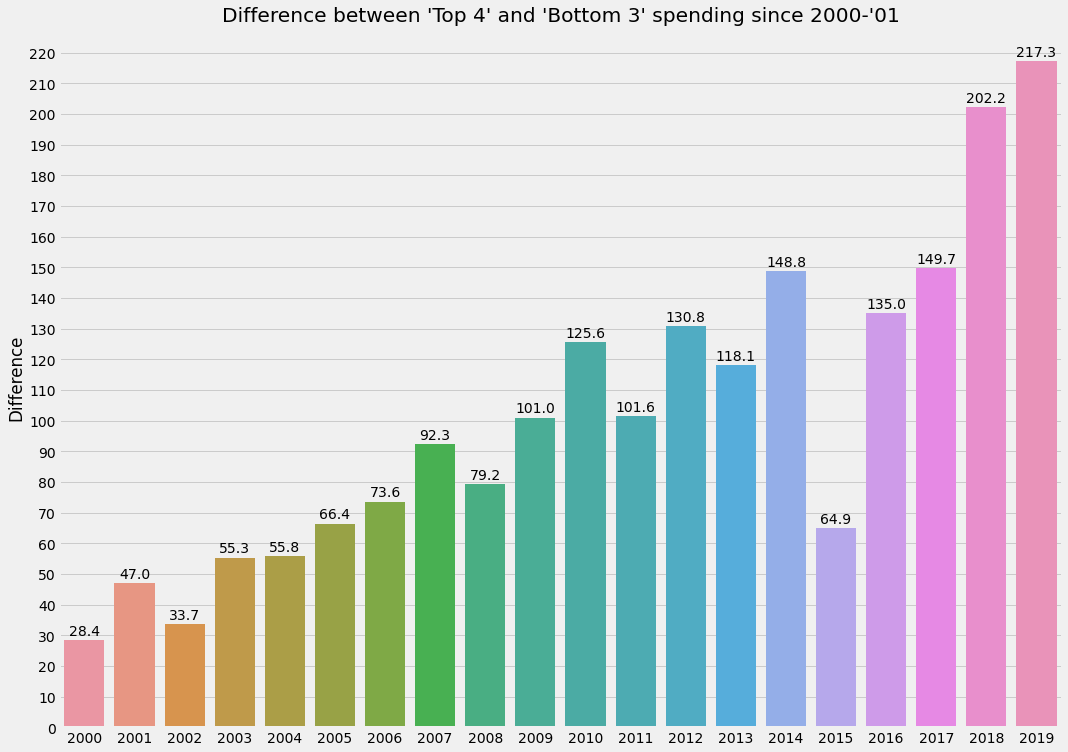

In [19]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = comparison.index, y = 'Difference', data = comparison)

plt.yticks(np.arange(0, comparison['Difference'].max() + 10, 10))

plt.title("Difference between 'Top 4' and 'Bottom 3' spending since 2000-'01")

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()


> What was once a pretty tight gap has become a seismic gulf seperating the "haves" and "have nots".  In the 2020-2021 season, **Top 4 teams spent an average of £117 million more than the Bottom 3 teams.**

> 2015 is an outlier because the champion (Leicester City) spent only £80 million, while 20th place Aston Villa spent almost £95 million.

---

### Bar chart showing the average 'cost per point' season by season in the EPL

In [20]:
cost_per_point = {}
count = 0
count2 = 20

for i in seasons:
    
    cost_per_point[i] = round(concatenated[count:count2]['Season Wage Bill (£mil)'].sum() / concatenated[count:count2]['Points Gained'].sum(), 2)
    
    count += 20
    count2 += 20
    
cost_per_point_df = (pd.DataFrame.from_dict(cost_per_point, orient = 'index').
                   rename(columns = {0 : 'Cost Per Point (£mil)'}))

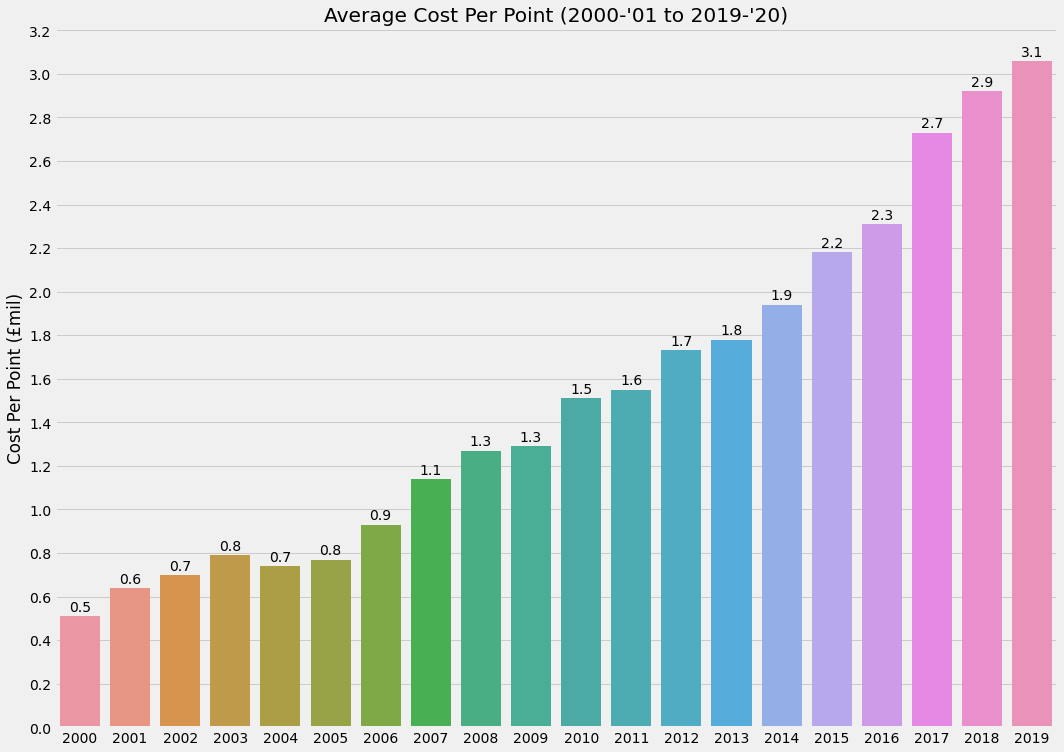

In [21]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 12))

splot = sns.barplot(x = cost_per_point_df.index, y = 'Cost Per Point (£mil)', data = cost_per_point_df)

plt.yticks(np.arange(0, cost_per_point_df['Cost Per Point (£mil)'].max() + 0.2, 0.2))

plt.title("Average Cost Per Point (2000-'01 to 2019-'20)")

for l in splot.patches:
        splot.annotate(format(l.get_height(), '.1f'), 
                   (l.get_x() + l.get_width() / 2., l.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

> As of 2020-2021, Premier League clubs pay on average **£3.1 million per point**, six times more than what it was 20 years ago.

> Yet, as we can see from the charts above, whereas Bottom 3 teams are spending roughly the same amount of money per season as they were 20 years ago, Top 4 teams are spending close to 10x more than what they once were.  

### **The cost to compete has risen, while only a select few teams are able to rise with it.**

---
## Big 6 Spending Since 2000

In [22]:
d = ({'MANCHESTER UNITED': [], 'LIVERPOOL': [], 'MANCHESTER CITY': [], 'TOTTENHAM HOTSPUR': [], 'ARSENAL': [], 
      'CHELSEA': [], 'SEASON': []})


for l in d.keys():
    
    for i, x, z in zip(concatenated['Team Name'], concatenated['Season Wage Bill (£mil)'], concatenated['dataset']):
            
            if i == l:
            
                d[l].append(x)
                
                d['SEASON'].append(z)
            
big6_df = pd.DataFrame.from_dict(d, orient = 'index')
big6_df = big6_df.fillna(0)
big6_df = big6_df.iloc[0:7, 0:20]
big6_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MANCHESTER UNITED,50,70,80,77,77,85,92,121,123,132,153,162,181,215,203,232,263,296,332,284
LIVERPOOL,49,56,54,66,64,69,78,90,107,121,135,119,132,144,166,208,208,264,310,326
MANCHESTER CITY,18,35,38,38,34,36,54,83,133,174,202,233,205,194,198,264,260,315,351,0
TOTTENHAM HOTSPUR,25,37,38,35,33,41,44,53,63,67,91,90,96,100,101,100,127,148,179,181
ARSENAL,41,62,61,70,66,83,90,101,104,111,124,143,154,166,192,195,199,240,232,225
CHELSEA,50,56,54,115,109,114,133,172,167,174,190,173,179,192,217,224,221,246,286,283
SEASON,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In [24]:
big6_transposed = big6_df.T

city = [18, 0, 35, 38, 38, 34, 36, 54, 83, 133, 174, 202, 233, 205, 194, 198, 264, 260, 315, 351]
big6_transposed['MANCHESTER CITY'] = city
big6_transposed

,MANCHESTER UNITED,LIVERPOOL,MANCHESTER CITY,TOTTENHAM HOTSPUR,ARSENAL,CHELSEA,SEASON
0,50,49,18,25,41,50,2000
1,70,56,0,37,62,56,2001
2,80,54,35,38,61,54,2002
3,77,66,38,35,70,115,2003
4,77,64,38,33,66,109,2004
5,85,69,34,41,83,114,2005
6,92,78,36,44,90,133,2006
7,121,90,54,53,101,172,2007
8,123,107,83,63,104,167,2008
9,132,121,133,67,111,174,2009


> The difference in this DataFrame as opposed to the one above is that we moved Manchester City's zero from the end to index position 1, because this is the season that they were actually relegated.

In [ ]:
teams = ['MANCHESTER UNITED', 'LIVERPOOL', 'MANCHESTER CITY', 'TOTTENHAM HOTSPUR', 'ARSENAL', 'CHELSEA']
final_list = []
    
for l in teams:

    chase = big6_transposed[l] # Creating a Series of each teams points for the season
    chase.index = np.arange(1, len(chase) + 1) # Starting index of Series at 1 rather than 0

    # Adding up a teams points week by week so that each week is equal to the sum of all the weeks proceeding it
    for i in range(1, len(chase)+ 1):
            if i == 1:
                chase[i] = chase[i]
            else:
                chase[i] = chase[i] + chase[i - 1]

    final_list.append(chase.tolist()) # Append each list to a list "final_list" of lists

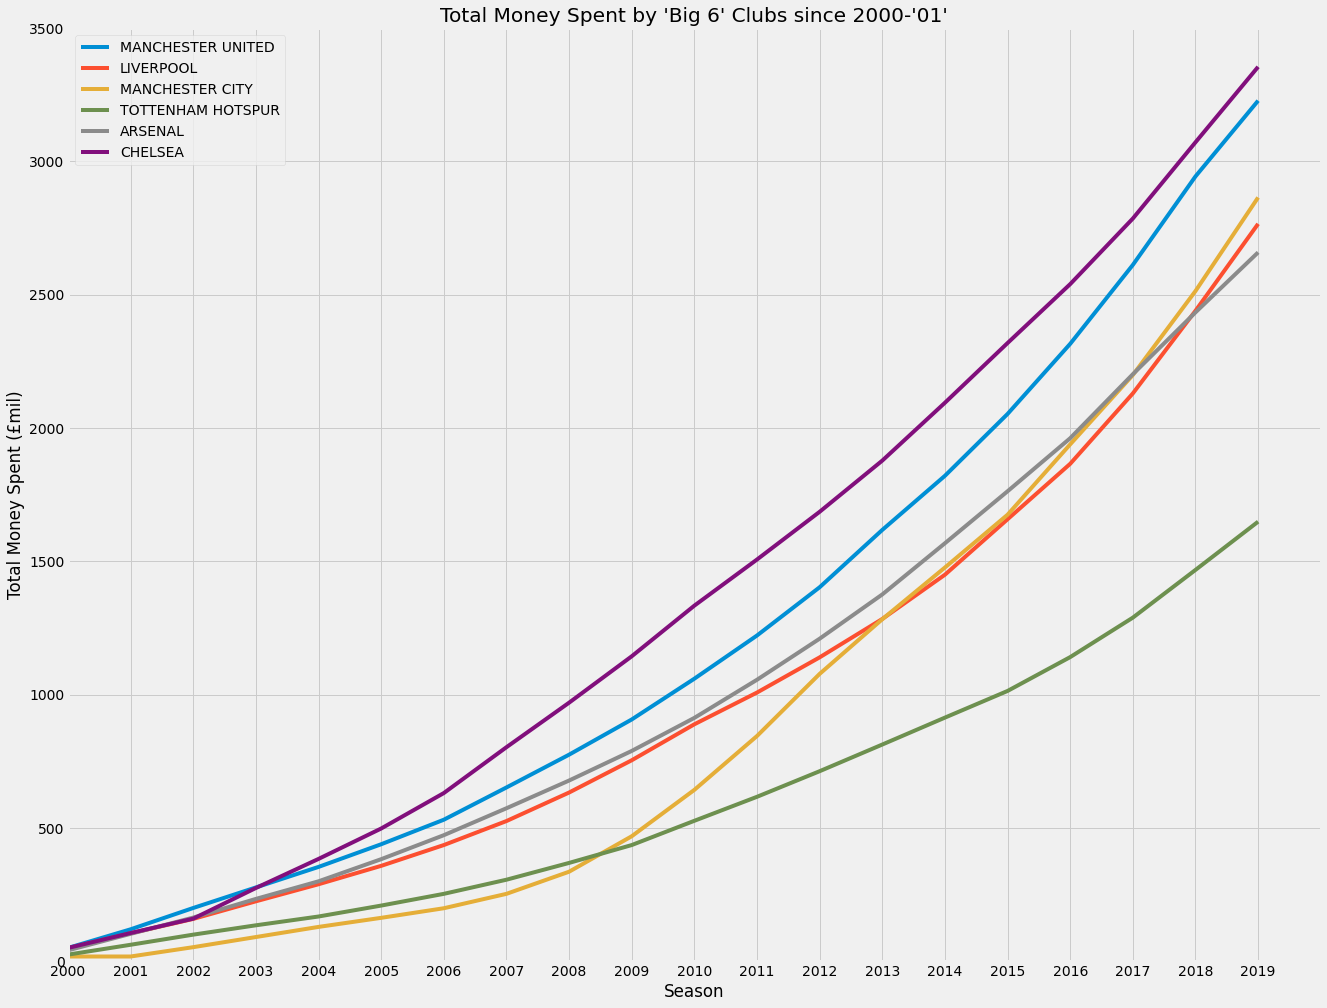

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 16))

# Plotting our lines and making our label = team name
[plt.plot(i, label = l) for i, l in zip(final_list, teams)]

plt.legend(loc = "upper left")
plt.xticks(np.arange(0, 20, 1), [i for i in big6_transposed['SEASON']])
plt.xlabel("Season")
plt.ylabel("Total Money Spent (£mil)")
plt.title("Total Money Spent by 'Big 6' Clubs since 2000-'01'")
plt.xlim(0, len(final_list[0]))
plt.ylim(0, 3500)
plt.show()

In [27]:
city = concatenated[concatenated['Team Name'] == 'MANCHESTER CITY']

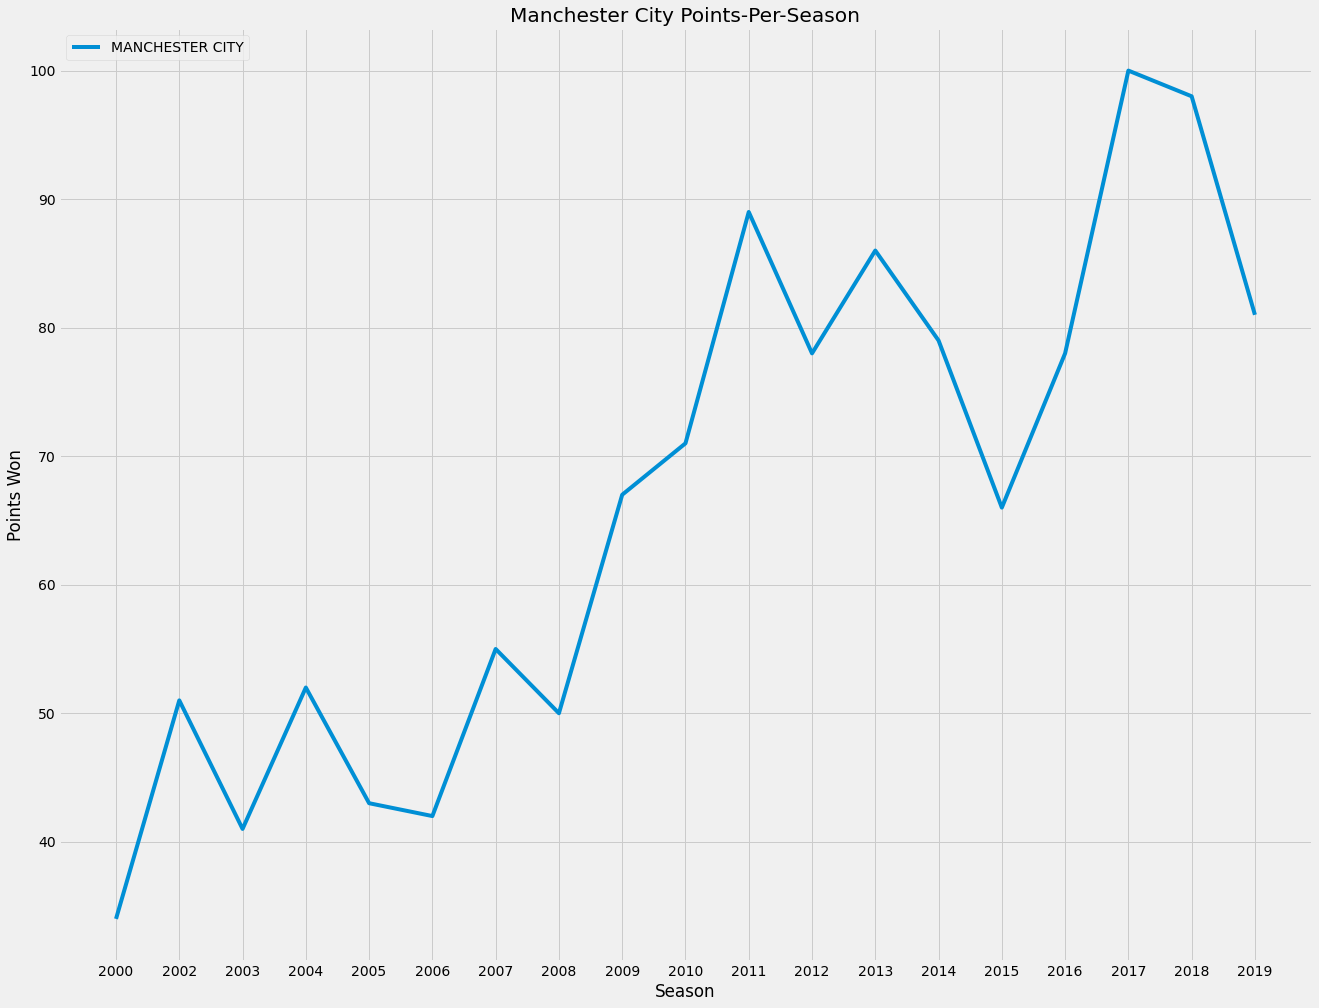

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 16))

# Plotting our lines and making our label = team name
sns.lineplot(x = 'dataset', y = 'Points Gained', data = city, hue = 'Team Name')

plt.legend(loc = "upper left")
plt.xlabel("Season")
plt.ylabel("Points Won")
plt.title("Manchester City Points-Per-Season")
plt.show()

---
## Greatest Outliers (Top 4)

In [30]:
team, year, wage, mean_list, standing = [], [], [], [], []

count = 0
count2 = 20

while count2 <= len(concatenated):
    for i, x, y, g in zip(concatenated['Season Wage Bill (£mil)'][count:count2][0:4], concatenated['dataset'][count:count2][0:4], concatenated['Team Name'][count:count2][0:4], concatenated['Final League Standing'][count:count2][0:4]):

        mean = concatenated[count:count2]['Season Wage Bill (£mil)'].mean()

        if i <= mean:
            team.append(y)
            year.append(x)
            wage.append(i)
            mean_list.append(mean)
            standing.append(g)

    count += 20
    count2 += 20

In [31]:
outlier_top4 = pd.DataFrame(list(zip(team, year, wage, mean_list, standing)),
                           columns = ['Team Name', 'Season', 'Wages Spent', 'League Average', 'Final Standing'])


outlier_top4

,Team Name,Season,Wages Spent,League Average,Final Standing
0,NEWCASTLE UNITED,2001,32,33.25,4
1,EVERTON,2004,31,38.35,4
2,LEICESTER CITY,2015,80,112.35,1
3,TOTTENHAM HOTSPUR,2015,100,112.35,3


> These four clubs all finished in the Top 4 of their respective seasons despite **spending less than the EPL average for that season.**

## Greatest Outliers (Bottom 3)

In [32]:
team, year, wage, mean_list, standing = [], [], [], [], []

count = 0
count2 = 20

while count2 <= len(concatenated):
    for i, x, y, g in zip(concatenated['Season Wage Bill (£mil)'][count:count2][17:], concatenated['dataset'][count:count2][17:], concatenated['Team Name'][count:count2][17:], concatenated['Final League Standing'][count:count2][17:]):

        mean = round(concatenated[count:count2]['Season Wage Bill (£mil)'].mean(), 2)

        if i >= mean:
            team.append(y)
            year.append(x)
            wage.append(i)
            mean_list.append(mean)
            standing.append(g)

    count += 20
    count2 += 20

In [33]:
outlier_bottom3 = pd.DataFrame(list(zip(team, year, wage, mean_list, standing)),
                           columns = ['Team Name', 'Season', 'Wages Spent', 'League Average', 'Final Standing'])


outlier_bottom3

,Team Name,Season,Wages Spent,League Average,Final Standing
0,NEWCASTLE UNITED,2008,73,66.4,18


> Newcastle in 2008 had one of the worst campaigns ever, being relegated despite **spending more than the EPL average for that season.**

### Thanks for reading!
---

*Michael Black*